In [8]:
#@author- Shivam Thassu

# Importing librarias required for project 
# Ready to go 

import pandas as pd #for dataframes
import numpy as np
import matplotlib.pyplot as plt #for plots
%matplotlib inline
plt.style.use('ggplot')

In [9]:
# Keeping all the DataFrames 

df1 = pd.read_excel('C:\ProgramData\Anaconda3\My files\Sipri_data.xlsx', sheetname ='Military_Expenditure',index_col = 'Country')
df1['Average'] = df1.mean(axis=1)
df1.sort_values(by = 'Average', ascending = False, inplace=True)

df2 = pd.read_excel('C:\ProgramData\Anaconda3\My files\Sipri_data.xlsx', sheetname ='Share_of_GDP',index_col = 'Country')
df3=df2*100
df3['Average'] = df3.mean(axis=1)
df3.sort_values(by = 'Average', ascending = False, inplace=True)

df4 = pd.read_excel('C:\ProgramData\Anaconda3\My files\Sipri_data.xlsx', sheetname ='Per_capita',index_col = 'Country')
df4['Average'] = df4.mean(axis=1) # Taking out the Average of the spending per capita
df4.sort_values(by = 'Average', ascending = False, inplace=True)

In [10]:
# Need to Calculate GDP per capita which is GDP divided by Population of the country

# Step 1 : Calculate GDP 
mil1=df1[["Average"]]
mil1.columns=["Military spending"]
mil2=df3[["Average"]]
mil2.columns=[" MS % of gdp"]
mil3=mil1.join(mil2)
mil3["GDP"]=mil3["Military spending"]/mil3[" MS % of gdp"]*100

# Step 2: Calculate Population
mil4 =df4[["Average"]]
mil4.columns=["MS per capita"]
mil5=mil4.join(mil3)
mil5["POP"]=mil3["Military spending"]/mil4["MS per capita"]

# Step 3: Calculate GDP per Capita and put all the columns above in one DataFrame
df5 = pd.DataFrame(mil5)
df5["gdp per capita"]=df5["GDP"]/df5["POP"]
df5

# Note: Population Calculated here is in Millions

,MS per capita,Military spending,MS % of gdp,GDP,POP,gdp per capita
Country,,,,,,
USA,2043.275368,639777.108200,4.012850,1.594321e+07,313.113503,50918.308985
Saudi Arabia,1908.296880,56387.404634,9.265985,6.085419e+05,29.548549,20594.646724
Australia,1010.787458,23007.732427,1.823818,1.261514e+06,22.762186,55421.497161
France,974.332880,61702.456834,2.287009,2.697954e+06,63.327902,42602.929281
UK,925.660623,58452.843107,2.193930,2.664299e+06,63.147164,42191.900009
"Korea, South",634.911484,31434.260028,2.613874,1.202593e+06,49.509673,24290.054757
Italy,574.128820,34209.458248,1.607515,2.128096e+06,59.584987,35715.305963
Germany,560.746276,45188.336428,1.267269,3.565806e+06,80.586066,44248.416984
Canada,531.280969,18370.109165,1.150535,1.596658e+06,34.577013,46176.863341


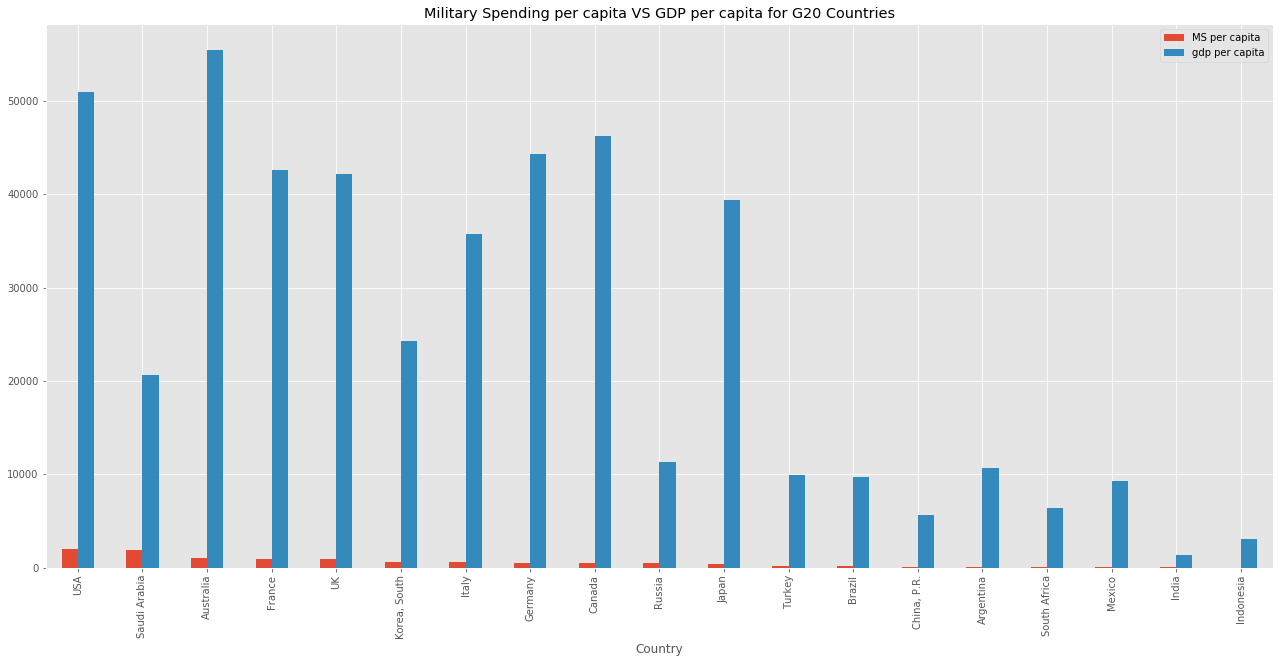

In [11]:
# Plotting a Bar graph Between Average Military Spending per Capita and GDP per Capita for G20 Countries

df5[["MS per capita","gdp per capita"]].plot.bar(figsize=(22,10),title="Military Spending per capita VS GDP per capita for G20 Countries")

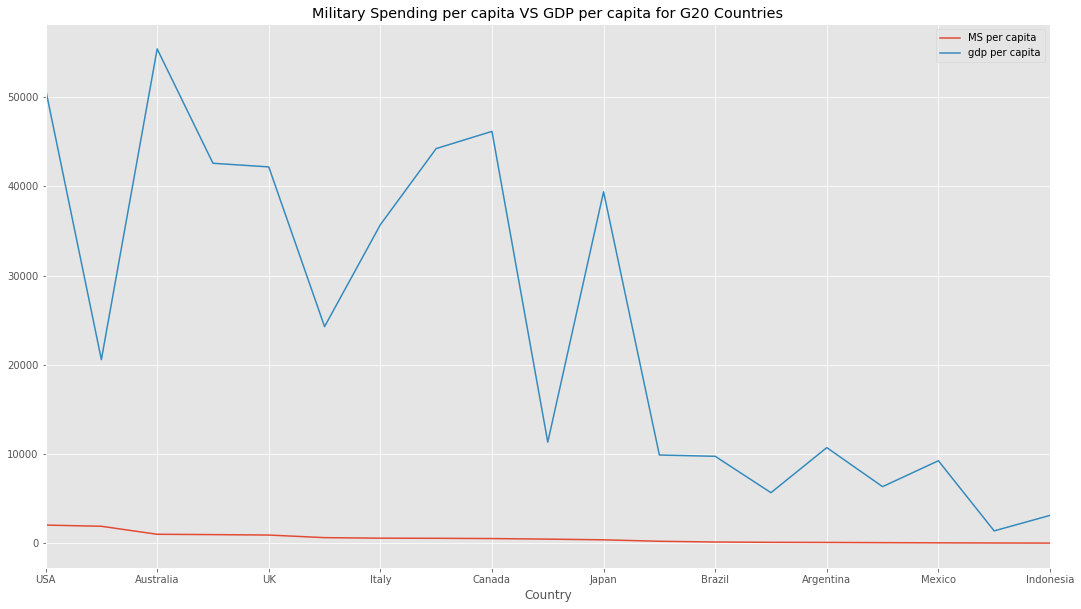

In [12]:
# Plotting a line graph Between Average Military Spending per Capita and GDP per Capita for G20 Countries

df5[["MS per capita","gdp per capita"]].plot.line(figsize=(18,10),title="Military Spending per capita VS GDP per capita for G20 Countries")

# Canada has high GDP per capita but MS per capita is low. Spends quite low on Military 

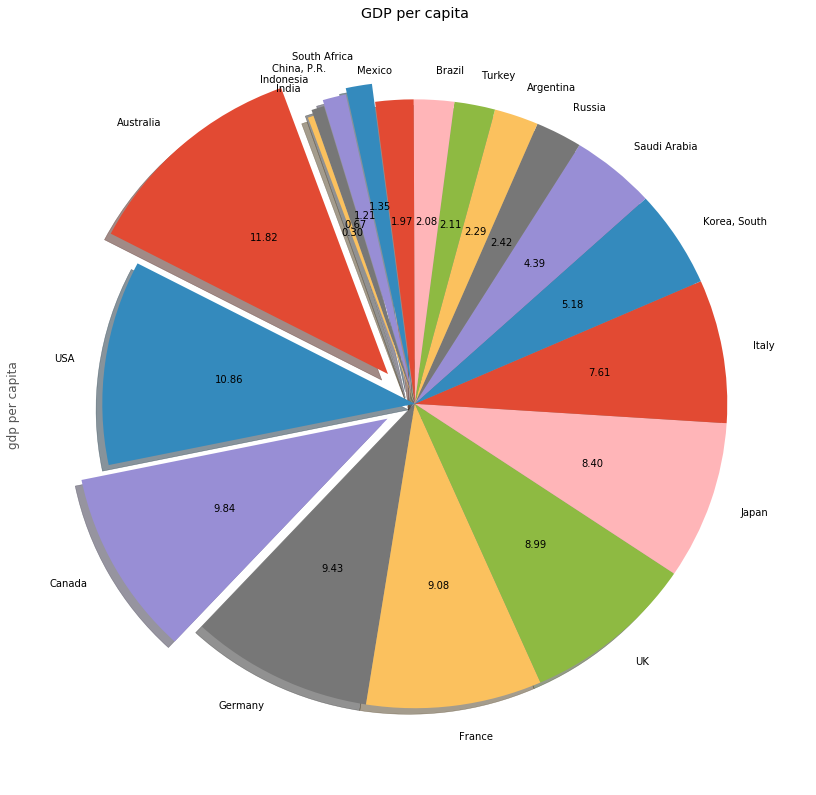

In [13]:
# Pie chart for GDP per capita for G20 countries

df5.sort_values(by = 'gdp per capita', ascending = False, inplace=True)
plt.figure(figsize=(14,14))
explode=(0.13,0,0.10,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0.04,0.02,0)
df5['gdp per capita'].plot(kind='pie',labeldistance=1.1, startangle=110,
                              fontsize=10,autopct='%.2f', legend=False, 
                              shadow=True, explode=explode)
plt.title('GDP per capita')

# Top countries with GDP per capita are

# Top Countries with most Military Spending are
# 1. Australia
# 2. USA
# 3. Canada
# 4. Germany
# 5. France